<h1> Phân loại và chẩn đoán Bệnh tiểu đường

## 1. Định nghĩa vấn đề (Define Problem)

- Mô tả:
    + Number of Instances: 768
    + Number of Attributes: 8 plus class
- Dữ liệu vào:
    + Number of times pregnant
    + Plasma glucose concentration a 2 hours in an oral glucose tolerance test
    + Diastolic blood pressure (mm Hg)
    + Triceps skin fold thickness (mm)
    + 2-Hour serum insulin (mu U/ml)
    + Body mass index (weight in kg/(height in m)^2)
    + Diabetes pedigree function
    + Age (years)
- Kết quả:
    + Class variable (0 or 1)
    + Class value 1 is interpreted as "tested positive for
   diabetes"

## 2. Chuẩn bị vấn đề (Prepare Problem)

### 2.1. Khai báo thư viện (Load Libraries)

In [41]:
import os, sys
from IPython import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import joblib

from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

import warnings

%matplotlib inline
warnings.filterwarnings("ignore")

### 2.2. Nạp dữ liệu (Load Dataset)

In [42]:
data_path = 'pima-indians-diabetes.csv'
data_names = [
    'pregnancies',                # Số lần mang thai
    'glucose',                    # Nồng độ glucose huyết tương
    'blood_pressure',             # Huyết áp tâm trương
    'skin_thickness',             # Độ dày nếp gấp da
    'insulin',                    # Insulin huyết thanh 2 giờ
    'bmi',                        # Chỉ số khối cơ thể
    'diabetes_pedigree_function', # Hàm di truyền tiểu đường
    'age',                        # Tuổi
    'outcome'                     # Kết quả (0: không mắc, 1: mắc tiểu đường)
]
df_dataset = pd.read_csv(data_path, names=data_names)
df_dataset

pregnancies  glucose  blood_pressure  skin_thickness  insulin   bmi  \
0              6      148              72              35        0  33.6   
1              1       85              66              29        0  26.6   
2              8      183              64               0        0  23.3   
3              1       89              66              23       94  28.1   
4              0      137              40              35      168  43.1   
..           ...      ...             ...             ...      ...   ...   
763           10      101              76              48      180  32.9   
764            2      122              70              27        0  36.8   
765            5      121              72              23      112  26.2   
766            1      126              60               0        0  30.1   
767            1       93              70              31        0  30.4   

     diabetes_pedigree_function  age  outcome  
0                         0.627   50        1  
1                         0.351   31        0  
2                         0.672   32        1  
3                         0.167   21        0  
4                         2.288   33        1  
..                          ...  ...      ...  
763                       0.171   63        0  
764                       0.340   27        0  
765                       0.245   30        0  
766                       0.349   47        1  
767                       0.315   23        0  

[768 rows x 9 columns]

## 3. Phân tích dữ liệu (Analyze Data)

### 3.1. Thống kê mô tả (Descriptive Statistics)

#### (1) **Hiển thị một số thông tin về dữ liệu**
+ Số dòng, số cột của dữ liệu
+ Kiểu dữ liệu của từng cột
+ 5 dòng đầu và 5 dòng cuối của bảng dữ liệu
+ Thông tin chung về dữ liệu

In [43]:
# shape
print(f"+ Shape:  {df_dataset.shape}")

#types
print(f"+ Data Types:\n{df_dataset.dtypes}")

# head, tail
print('+ Content:')
display.display(df_dataset.head())
display.display(df_dataset.tail())
# info
print('+ Info:')
df_dataset.info()

+ Shape:  (768, 9)
+ Data Types:
pregnancies                     int64
glucose                         int64
blood_pressure                  int64
skin_thickness                  int64
insulin                         int64
bmi                           float64
diabetes_pedigree_function    float64
age                             int64
outcome                         int64
dtype: object
+ Content:


pregnancies  glucose  blood_pressure  skin_thickness  insulin   bmi  \
0            6      148              72              35        0  33.6   
1            1       85              66              29        0  26.6   
2            8      183              64               0        0  23.3   
3            1       89              66              23       94  28.1   
4            0      137              40              35      168  43.1   

   diabetes_pedigree_function  age  outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1

pregnancies  glucose  blood_pressure  skin_thickness  insulin   bmi  \
763           10      101              76              48      180  32.9   
764            2      122              70              27        0  36.8   
765            5      121              72              23      112  26.2   
766            1      126              60               0        0  30.1   
767            1       93              70              31        0  30.4   

     diabetes_pedigree_function  age  outcome  
763                       0.171   63        0  
764                       0.340   27        0  
765                       0.245   30        0  
766                       0.349   47        1  
767                       0.315   23        0

+ Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   pregnancies                 768 non-null    int64  
 1   glucose                     768 non-null    int64  
 2   blood_pressure              768 non-null    int64  
 3   skin_thickness              768 non-null    int64  
 4   insulin                     768 non-null    int64  
 5   bmi                         768 non-null    float64
 6   diabetes_pedigree_function  768 non-null    float64
 7   age                         768 non-null    int64  
 8   outcome                     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


#### (2) **Kiểm tra tính toàn vẹn của dữ liệu**
+ Dữ liệu có bị trùng lặp không? Hiển thị dòng bị vi phạm.
+ Dữ liệu có tồn tại giá trị Null không? Hiển thị dòng bị vi phạm.
+ Dữ liệu có tồn tại giá trị NaN không? Hiển thị dòng bị vi phạm.

In [44]:
has_null = df_dataset.isnull().sum().any()
has_nan  = df_dataset.isna().sum().any()
n_duplicated = df_dataset.duplicated().sum()
print(f'Tính toàn vẹn dữ liệu:')
print(f'+ Có giá trị Null: {has_null}')
if has_null:
    display.display(df_dataset[df_dataset.isnull().any(axis=1)])
print(f'+ Có giá trị Nan: {has_nan}')
if has_nan:
    display.display(df_dataset[df_dataset.isna().any(axis=1)])
print(f'+ Số dòng trùng: {n_duplicated}')
if n_duplicated>0:
    display.display(df_dataset[df_dataset.duplicated()])

Tính toàn vẹn dữ liệu:
+ Có giá trị Null: False
+ Có giá trị Nan: False
+ Số dòng trùng: 0


**Nhận xét**
- Dữ liệu không có giá trị rỗng (Null, Nan)
- Dữ liệu không có dòng bị trùng

#### (3) **Các tính chất thống kê trên dữ liệu số**
+ Count, Mean, Standard Deviation, Minimum Value
+ 25th Percentile, 50th Percentile (Median), 75th Percentile, Maximum Value

In [45]:
df_dataset.describe()

pregnancies     glucose  blood_pressure  skin_thickness     insulin  \
count   768.000000  768.000000      768.000000      768.000000  768.000000   
mean      3.845052  120.894531       69.105469       20.536458   79.799479   
std       3.369578   31.972618       19.355807       15.952218  115.244002   
min       0.000000    0.000000        0.000000        0.000000    0.000000   
25%       1.000000   99.000000       62.000000        0.000000    0.000000   
50%       3.000000  117.000000       72.000000       23.000000   30.500000   
75%       6.000000  140.250000       80.000000       32.000000  127.250000   
max      17.000000  199.000000      122.000000       99.000000  846.000000   

              bmi  diabetes_pedigree_function         age     outcome  
count  768.000000                  768.000000  768.000000  768.000000  
mean    31.992578                    0.471876   33.240885    0.348958  
std      7.884160                    0.331329   11.760232    0.476951  
min      0.000000                    0.078000   21.000000    0.000000  
25%     27.300000                    0.243750   24.000000    0.000000  
50%     32.000000                    0.372500   29.000000    0.000000  
75%     36.600000                    0.626250   41.000000    1.000000  
max     67.100000                    2.420000   81.000000    1.000000

#### (4) **Tần số xuất hiện (Distribution) trên dữ liệu phân lớp (Class) và dữ liệu danh mục (Category)**

Đối với bài toán phân lớp (classification problem), chúng ta cần tính số lần xuất hiện của thuộc tính phân lớp. Điều này là cần thiết cho vấn đề mất cân bằng (highly imbalanced problems) giữa các lớp nhằm cần xử lý đặc biệt trong bước chuẩn bị dữ liệu.

In [46]:
df_dataset['outcome'].value_counts()

outcome
0    500
1    268
Name: count, dtype: int64

**Nhận xét**
- 500 người bị bệnh tiểu đường
- 268 người không bị bệnh tiểu đường

#### (5) **Mối tương quan giữa các tính chất (Correlations)**

In [47]:
correlations = df_dataset.corr(method='pearson')
correlations

pregnancies   glucose  blood_pressure  \
pregnancies                    1.000000  0.129459        0.141282   
glucose                        0.129459  1.000000        0.152590   
blood_pressure                 0.141282  0.152590        1.000000   
skin_thickness                -0.081672  0.057328        0.207371   
insulin                       -0.073535  0.331357        0.088933   
bmi                            0.017683  0.221071        0.281805   
diabetes_pedigree_function    -0.033523  0.137337        0.041265   
age                            0.544341  0.263514        0.239528   
outcome                        0.221898  0.466581        0.065068   

                            skin_thickness   insulin       bmi  \
pregnancies                      -0.081672 -0.073535  0.017683   
glucose                           0.057328  0.331357  0.221071   
blood_pressure                    0.207371  0.088933  0.281805   
skin_thickness                    1.000000  0.436783  0.392573   
insulin                           0.436783  1.000000  0.197859   
bmi                               0.392573  0.197859  1.000000   
diabetes_pedigree_function        0.183928  0.185071  0.140647   
age                              -0.113970 -0.042163  0.036242   
outcome                           0.074752  0.130548  0.292695   

                            diabetes_pedigree_function       age   outcome  
pregnancies                                  -0.033523  0.544341  0.221898  
glucose                                       0.137337  0.263514  0.466581  
blood_pressure                                0.041265  0.239528  0.065068  
skin_thickness                                0.183928 -0.113970  0.074752  
insulin                                       0.185071 -0.042163  0.130548  
bmi                                           0.140647  0.036242  0.292695  
diabetes_pedigree_function                    1.000000  0.033561  0.173844  
age                                           0.033561  1.000000  0.238356  
outcome                                       0.173844  0.238356  1.000000

**Tương quan giữa các đặc trưng**

- Glucose và Outcome: có hệ số tương quan khá cao **(0.4666)**, cho thấy mức glucose là yếu tố quan trọng trong việc dự đoán khả năng mắc tiểu đường.

- BMI và Outcome: có mức tương quan dương **(0.2927)** – những người có BMI cao có xu hướng dễ mắc tiểu đường hơn.

- Pregnancies và Age: có tương quan cao **(0.5444)**, hợp lý vì tuổi càng cao thì số lần mang thai (ở nữ) thường nhiều hơn.

- Skin Thickness và Insulin: tương quan khá mạnh **(0.4369)**.

- Skin Thickness và BMI: cũng có tương quan đáng kể **(0.3926)**.

### 3.2. Hiển thị dữ liệu (Visualize Data)

#### (1) Hiển thị trên từng tính chất đơn (Univariate Plots)

**Box and whisker plots**

<Axes: >

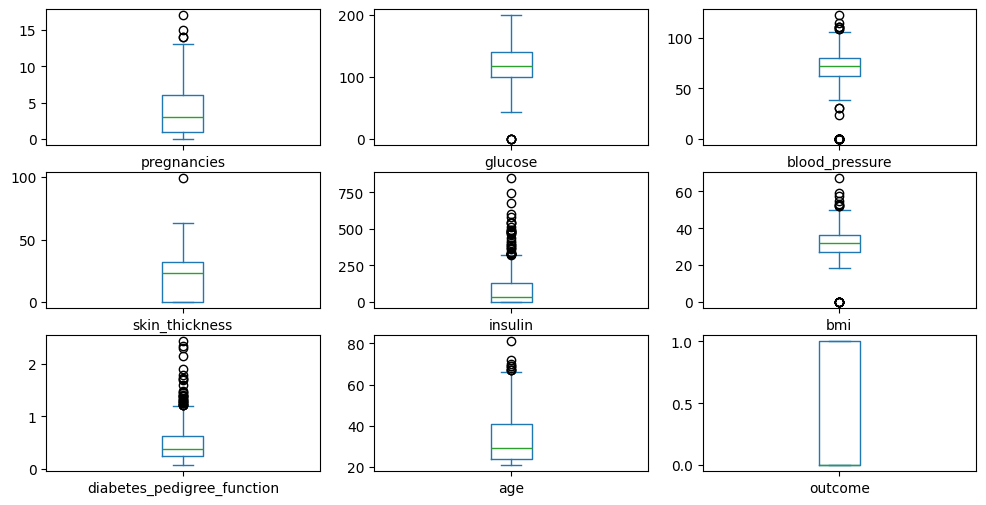

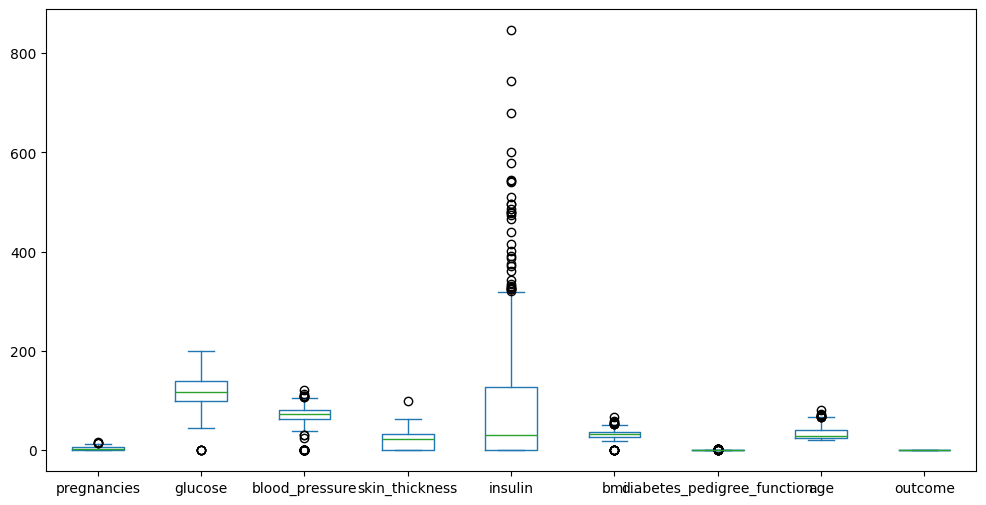

In [48]:
df_dataset.plot(kind="box", subplots=True, layout=(3, 3), sharex=False, sharey=False, figsize=(12,6))
df_dataset.plot(kind="box", figsize=(12,6))

**Nhận xét:**

- Pregnancies (số lần mang thai):
  + Phần lớn giá trị nằm trong khoảng 0–6.
  + Có một số giá trị ngoại lai (outliers) lớn hơn 12.

- Glucose (lượng đường huyết):
  + Giá trị trung vị khoảng 110–120.
  + Nhiều giá trị bằng 0 (không hợp lệ) và cao (>200).

- Blood Pressure (huyết áp):
  + Trung vị khoảng 70.
  + Có một số giá trị bằng 0 (không thực tế với dữ liệu huyết áp).
  + Một số outliers cao trên 120.

- Skin Thickness (độ dày da):
  + Nhiều giá trị bằng 0 (có thể dữ liệu thiếu hoặc nhập sai).
  + Trung vị khoảng 25.

- Insulin:
  + Có rất nhiều giá trị bằng 0 (không thực tế, cho thấy dữ liệu bị thiếu).
  + Nhiều ngoại lai cao (lớn hơn 600).

- BMI (chỉ số khối cơ thể):
  + Trung vị khoảng 30.
  + Có một số giá trị bằng 0 (không thực tế).
  + Một số outliers trên 60.

- Diabetes Pedigree Function:
  + Phân bố lệch phải (skewed), phần lớn giá trị nhỏ hơn 1.
  + Một số outliers trên 2.

- Age (tuổi):
  + Trung vị khoảng 30.
  + Nhiều giá trị ngoại lai ở tuổi trên 70.

- Outcome (kết quả mắc bệnh hay không):
  + Đây là biến nhị phân (0 hoặc 1).
  + Không có ngoại lai.

**Tổng kết:**

- Nhiều thuộc tính (như glucose, blood_pressure, skin_thickness, insulin, bmi) có giá trị bằng 0 không hợp lý, cần xử lý như dữ liệu thiếu.
- Dữ liệu chứa nhiều outliers, đặc biệt ở insulin và glucose.
- Các đặc trưng có phân bố lệch (skewed) như diabetes_pedigree_function, insulin.


**Biểu đồ Histogram**

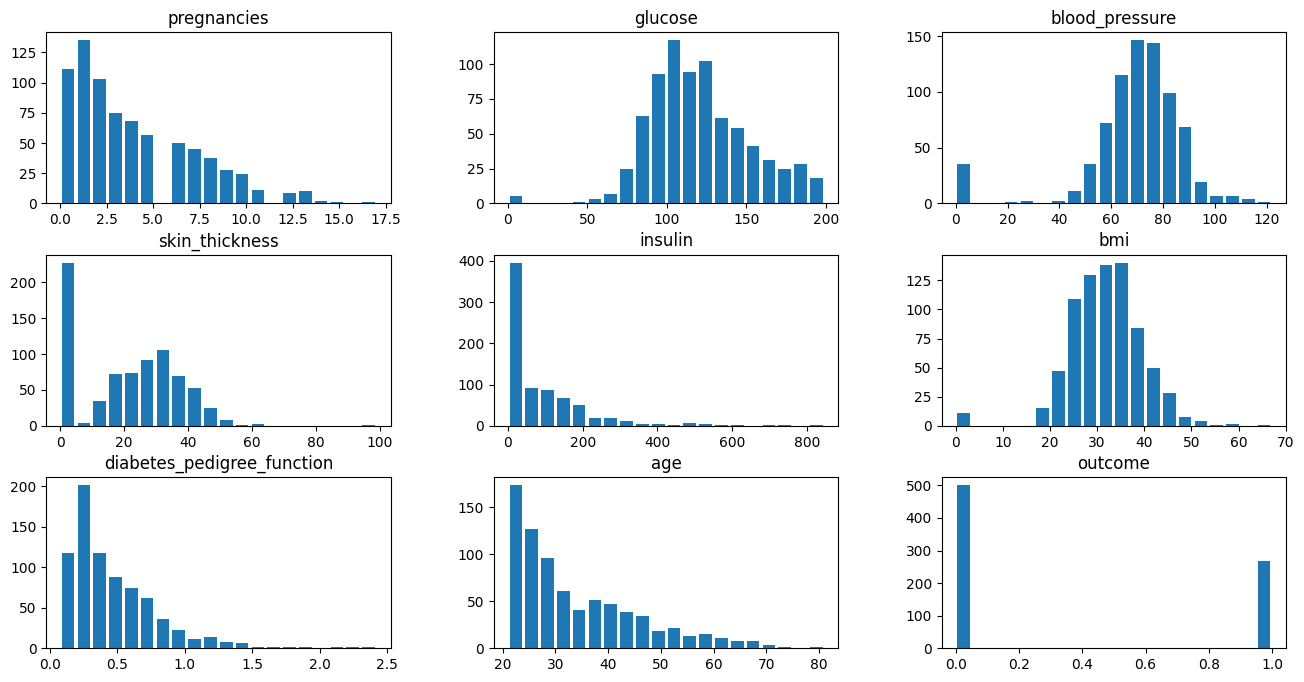

In [49]:
df_dataset.hist(figsize=(16, 8), grid=False, rwidth=0.8, bins = 20);

Dựa vào biểu đồ ta có thể thấy:
- Nhóm tuổi chiếm nhiều nhất là từ 21 – 30 tuổi.
- Glucose cao nhất ở mức 100 – 125.
- BMI cao nhất là từ khoảng 20 – 40.
- Có 268/768 người được chẩn đoán mắc tiểu đường, 500 người không mắc.
- Số lần mang thai phổ biến nhất là 1 lần mang thai.


#### (2) Hiển thị nhiều tính chất (Multivariate Plots)

array([[<Axes: xlabel='pregnancies', ylabel='pregnancies'>,
        <Axes: xlabel='glucose', ylabel='pregnancies'>,
        <Axes: xlabel='blood_pressure', ylabel='pregnancies'>,
        <Axes: xlabel='skin_thickness', ylabel='pregnancies'>,
        <Axes: xlabel='insulin', ylabel='pregnancies'>,
        <Axes: xlabel='bmi', ylabel='pregnancies'>,
        <Axes: xlabel='diabetes_pedigree_function', ylabel='pregnancies'>,
        <Axes: xlabel='age', ylabel='pregnancies'>,
        <Axes: xlabel='outcome', ylabel='pregnancies'>],
       [<Axes: xlabel='pregnancies', ylabel='glucose'>,
        <Axes: xlabel='glucose', ylabel='glucose'>,
        <Axes: xlabel='blood_pressure', ylabel='glucose'>,
        <Axes: xlabel='skin_thickness', ylabel='glucose'>,
        <Axes: xlabel='insulin', ylabel='glucose'>,
        <Axes: xlabel='bmi', ylabel='glucose'>,
        <Axes: xlabel='diabetes_pedigree_function', ylabel='glucose'>,
        <Axes: xlabel='age', ylabel='glucose'>,
        <Axes: xlabel

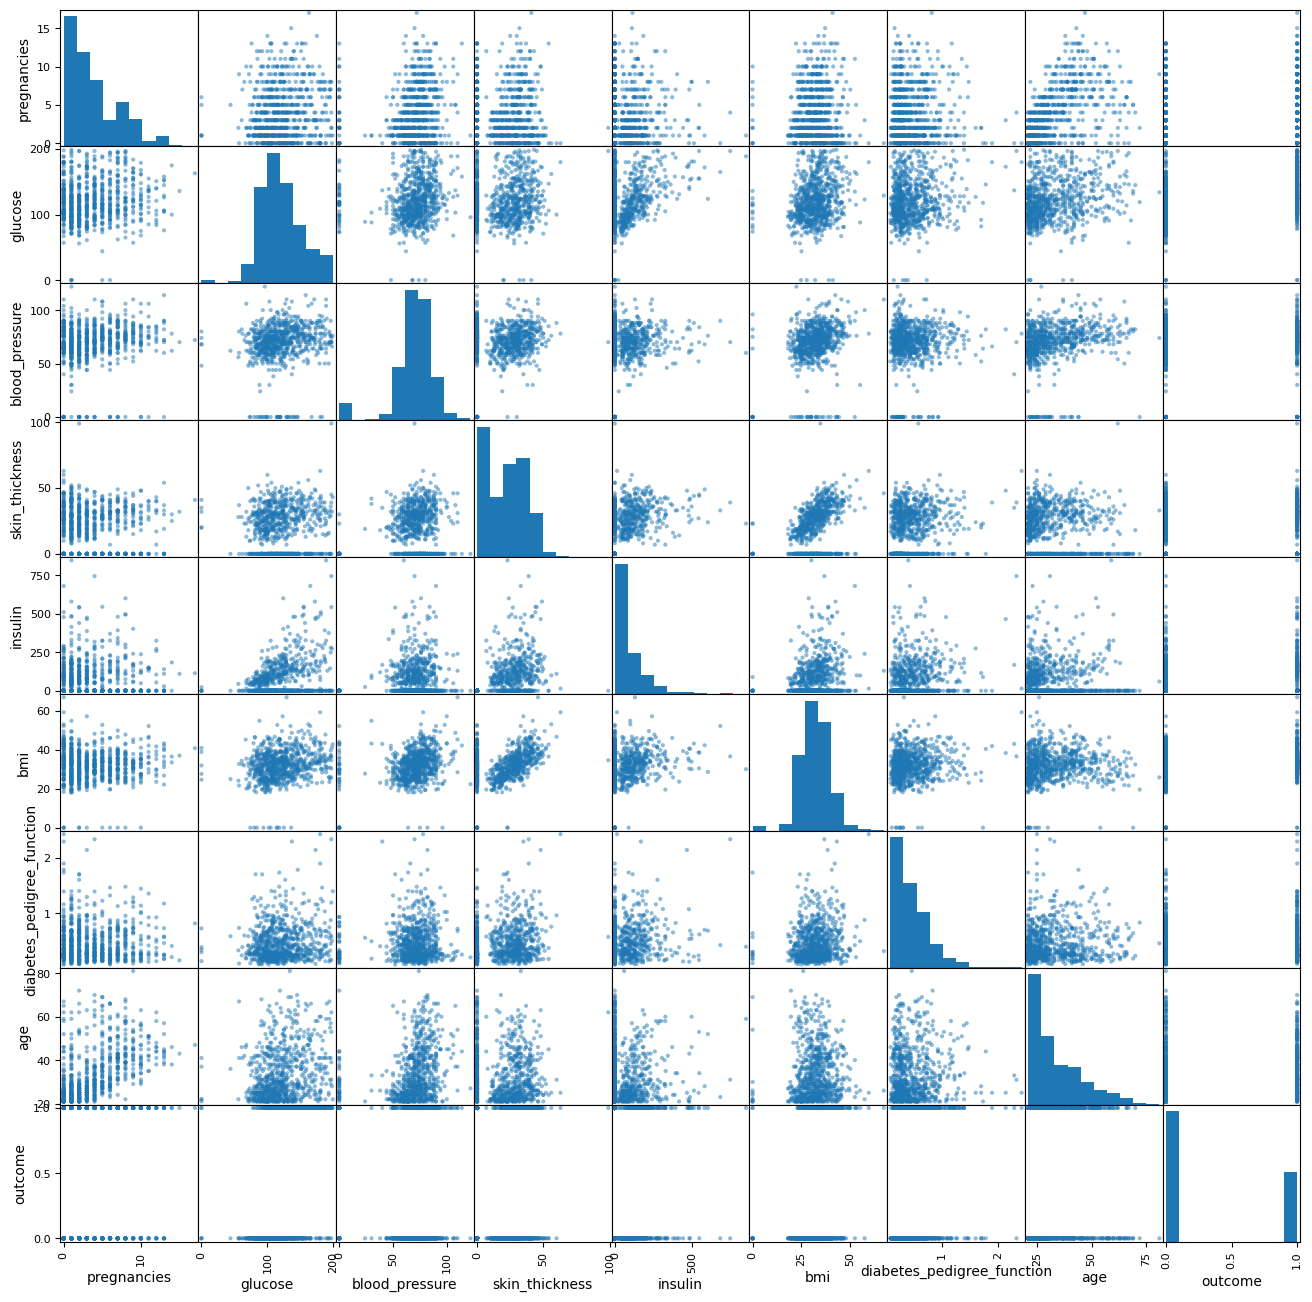

In [50]:
pd.plotting.scatter_matrix(df_dataset, figsize=(16,16))

[Text(0, 0, 'pregnancies'),
 Text(0, 1, 'glucose'),
 Text(0, 2, 'blood_pressure'),
 Text(0, 3, 'skin_thickness'),
 Text(0, 4, 'insulin'),
 Text(0, 5, 'bmi'),
 Text(0, 6, 'diabetes_pedigree_function'),
 Text(0, 7, 'age')]

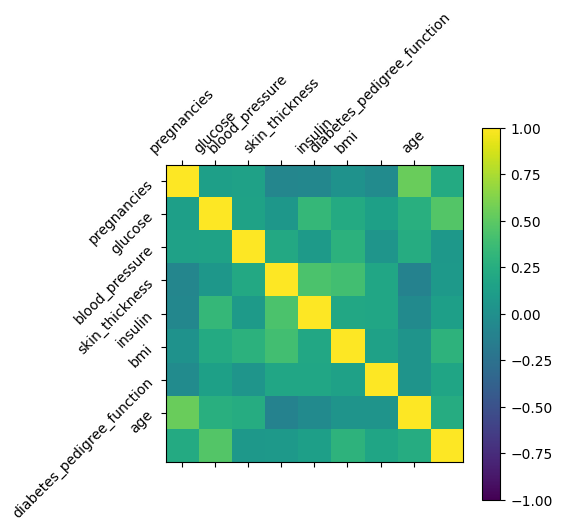

In [51]:
plt.matshow(correlations,vmin = -1, vmax = 1), plt.colorbar()
plt.xticks(np.arange(0,8), rotation = 45)
plt.yticks(np.arange(0,8), rotation = 45)
plt.gca().set_xticklabels(list(df_dataset.columns[:-1]))
plt.gca().set_yticklabels(list(df_dataset.columns[:-1]))

## 4. Chuẩn bị dữ liệu (Prepare Data)

### 4.1. Làm sạch dữ liệu (Data Cleaning)

#### (1) Tạo bảng dữ liệu sạch
- Chỉ giữ lại các cột input, output

In [52]:
df_clean = df_dataset.copy()

#### (2) Xóa dữ liệu trùng nhau

In [53]:
df_clean.drop_duplicates(ignore_index=True, inplace=True)
df_clean

pregnancies  glucose  blood_pressure  skin_thickness  insulin   bmi  \
0              6      148              72              35        0  33.6   
1              1       85              66              29        0  26.6   
2              8      183              64               0        0  23.3   
3              1       89              66              23       94  28.1   
4              0      137              40              35      168  43.1   
..           ...      ...             ...             ...      ...   ...   
763           10      101              76              48      180  32.9   
764            2      122              70              27        0  36.8   
765            5      121              72              23      112  26.2   
766            1      126              60               0        0  30.1   
767            1       93              70              31        0  30.4   

     diabetes_pedigree_function  age  outcome  
0                         0.627   50        1  
1                         0.351   31        0  
2                         0.672   32        1  
3                         0.167   21        0  
4                         2.288   33        1  
..                          ...  ...      ...  
763                       0.171   63        0  
764                       0.340   27        0  
765                       0.245   30        0  
766                       0.349   47        1  
767                       0.315   23        0  

[768 rows x 9 columns]

#### (3) Xử lí giá trị rỗng, không hợp lệ

##### Xử lí rỗng

In [54]:
has_null = df_dataset.isnull().sum().any()
has_nan  = df_dataset.isna().sum().any()
print(f'+ Có giá trị Null: {has_null}')
if has_null:
    display.display(df_dataset[df_dataset.isnull().any(axis=1)])
print(f'+ Có giá trị Nan: {has_nan}')
if has_nan:
    display.display(df_dataset[df_dataset.isna().any(axis=1)])

+ Có giá trị Null: False
+ Có giá trị Nan: False


##### Xử lí không hợp lệ
- glucose
- blood_pressure
- skin_thickness
- insulin
- bmi

Thay thế các giá trị không hợp lệ (bằng 0) bằng nan

In [55]:
df_clean['glucose'].replace(0, np.nan, inplace=True)
df_clean['blood_pressure'].replace(0, np.nan, inplace=True)
df_clean['skin_thickness'].replace(0, np.nan, inplace=True)
df_clean['insulin'].replace(0, np.nan, inplace=True)
df_clean['bmi'].replace(0, np.nan, inplace=True)
# Kiểm tra
df_clean.isna().sum()

pregnancies                     0
glucose                         5
blood_pressure                 35
skin_thickness                227
insulin                       374
bmi                            11
diabetes_pedigree_function      0
age                             0
outcome                         0
dtype: int64

Ưu tiên điền các thuộc tính có ít giá trị không hợp lệ (glucose, blood_pressure, bmi)

In [56]:
df_clean['glucose'].fillna(df_clean['glucose'].median(), inplace=True)
df_clean['blood_pressure'].fillna(df_clean['blood_pressure'].median(), inplace=True)
df_clean['bmi'].fillna(df_clean['bmi'].median(), inplace=True)

skin_thickness tương quan cao với bmi

=> Điển giá trị median cho skin_thickness theo nhóm bmi

In [57]:
df_clean['bmi_group'] = pd.cut(df_clean['bmi'], bins=[0, 18.5, 25, 30, 35, 100],
                               labels=['Underweight', 'Normal', 'Overweight', 'Obese I', 'Obese II+'])
df_clean['skin_thickness'].fillna(df_clean.groupby('bmi_group')['skin_thickness'].transform('median'), inplace=True)

insulin tương quan cao với skin_thickness và glucose

In [58]:
df_clean['insulin'] = df_clean.groupby(['glucose', 'skin_thickness'])['insulin']\
                  .transform(lambda x: x.fillna(x.median()))

# Nếu vẫn còn NaN (vì nhóm nào đó toàn bộ insulin đều NaN), có thể điền thêm median chung
df_clean['insulin'] = df_clean['insulin'].fillna(df_clean['insulin'].median())

In [59]:
# Xóa các cột thừa
df_clean.drop('bmi_group', axis=1, inplace=True)

In [60]:
df_clean.isna().sum()
df_clean

pregnancies  glucose  blood_pressure  skin_thickness  insulin   bmi  \
0              6    148.0            72.0            35.0    125.0  33.6   
1              1     85.0            66.0            29.0    125.0  26.6   
2              8    183.0            64.0            17.0    125.0  23.3   
3              1     89.0            66.0            23.0     94.0  28.1   
4              0    137.0            40.0            35.0    168.0  43.1   
..           ...      ...             ...             ...      ...   ...   
763           10    101.0            76.0            48.0    180.0  32.9   
764            2    122.0            70.0            27.0    200.0  36.8   
765            5    121.0            72.0            23.0    112.0  26.2   
766            1    126.0            60.0            30.0    125.0  30.1   
767            1     93.0            70.0            31.0    125.0  30.4   

     diabetes_pedigree_function  age  outcome  
0                         0.627   50        1  
1                         0.351   31        0  
2                         0.672   32        1  
3                         0.167   21        0  
4                         2.288   33        1  
..                          ...  ...      ...  
763                       0.171   63        0  
764                       0.340   27        0  
765                       0.245   30        0  
766                       0.349   47        1  
767                       0.315   23        0  

[768 rows x 9 columns]

### 4.2. Biến đổi dữ liệu (Data Transforms)

#### (1) Chuẩn hóa dữ liệu (Data Normalize)

Chuẩn hóa các tính chất để đưa về cùng một miền trị
+ Min-Max Normalization
$$
z = \frac{x - min(x)}{max(x) - min(x)}
$$
+ Standard Normalization
$$
z = \frac{x - \mu}{\sigma}
$$

##### Min-Max Normalization

In [61]:
scale_columns = ['pregnancies', 'glucose', 'blood_pressure', 'skin_thickness', 'insulin', 'bmi', 'diabetes_pedigree_function', 'age']
minmax_scaler = MinMaxScaler()
minmax_scaler.fit(df_clean[scale_columns])
df_clean_minmax = df_clean.copy()
df_clean_minmax[scale_columns] = minmax_scaler.transform(df_clean[scale_columns])
df_clean_minmax

pregnancies   glucose  blood_pressure  skin_thickness   insulin  \
0       0.352941  0.670968        0.489796        0.304348  0.133413   
1       0.058824  0.264516        0.428571        0.239130  0.133413   
2       0.470588  0.896774        0.408163        0.108696  0.133413   
3       0.058824  0.290323        0.428571        0.173913  0.096154   
4       0.000000  0.600000        0.163265        0.304348  0.185096   
..           ...       ...             ...             ...       ...   
763     0.588235  0.367742        0.530612        0.445652  0.199519   
764     0.117647  0.503226        0.469388        0.217391  0.223558   
765     0.294118  0.496774        0.489796        0.173913  0.117788   
766     0.058824  0.529032        0.367347        0.250000  0.133413   
767     0.058824  0.316129        0.469388        0.260870  0.133413   

          bmi  diabetes_pedigree_function       age  outcome  
0    0.314928                    0.234415  0.483333        1  
1    0.171779                    0.116567  0.166667        0  
2    0.104294                    0.253629  0.183333        1  
3    0.202454                    0.038002  0.000000        0  
4    0.509202                    0.943638  0.200000        1  
..        ...                         ...       ...      ...  
763  0.300613                    0.039710  0.700000        0  
764  0.380368                    0.111870  0.100000        0  
765  0.163599                    0.071307  0.150000        0  
766  0.243354                    0.115713  0.433333        1  
767  0.249489                    0.101196  0.033333        0  

[768 rows x 9 columns]

<Axes: >

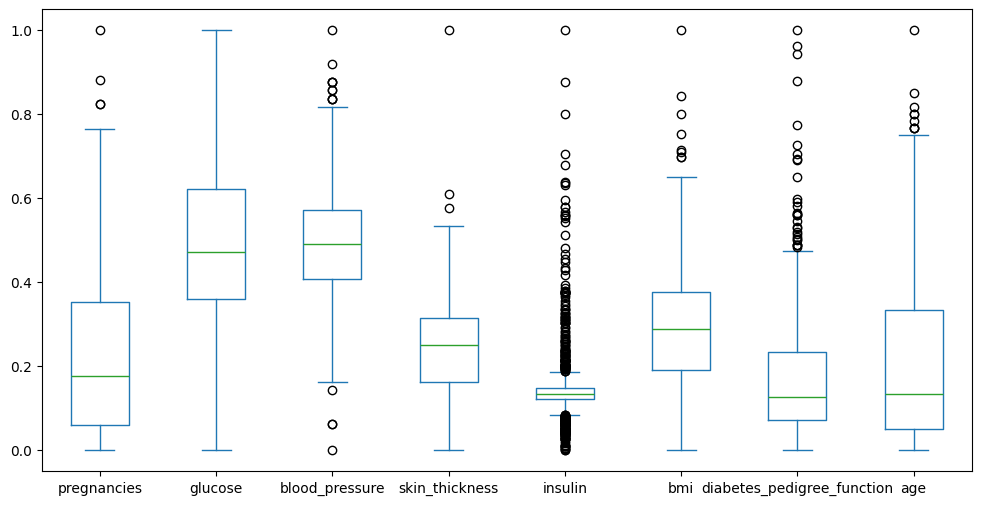

In [62]:
df_clean_minmax[scale_columns].plot(kind="box", figsize=(12,6))

##### Standard Normalization

In [63]:
standard_scaler = StandardScaler()
standard_scaler.fit(df_clean[scale_columns])
df_clean_standard = df_clean.copy()
df_clean_standard[scale_columns] = standard_scaler.transform(df_clean[scale_columns])
df_clean_standard

pregnancies   glucose  blood_pressure  skin_thickness   insulin  \
0       0.639947  0.866045       -0.031990        0.657489 -0.191115   
1      -0.844885 -1.205066       -0.528319        0.035883 -0.191115   
2       1.233880  2.016662       -0.693761       -1.207330 -0.191115   
3      -0.844885 -1.073567       -0.528319       -0.585723 -0.543724   
4      -1.141852  0.504422       -2.679076        0.657489  0.297988   
..           ...       ...             ...             ...       ...   
763     1.827813 -0.679069        0.298896        2.004302  0.434482   
764    -0.547919  0.011301       -0.197433       -0.171319  0.661972   
765     0.342981 -0.021574       -0.031990       -0.585723 -0.338984   
766    -0.844885  0.142800       -1.024647        0.139484 -0.191115   
767    -0.844885 -0.942068       -0.197433        0.243085 -0.191115   

          bmi  diabetes_pedigree_function       age  outcome  
0    0.166619                    0.468492  1.425995        1  
1   -0.852200                   -0.365061 -0.190672        0  
2   -1.332500                    0.604397 -0.105584        1  
3   -0.633881                   -0.920763 -1.041549        0  
4    1.549303                    5.484909 -0.020496        1  
..        ...                         ...       ...      ...  
763  0.064737                   -0.908682  2.532136        0  
764  0.632365                   -0.398282 -0.531023        0  
765 -0.910418                   -0.685193 -0.275760        0  
766 -0.342790                   -0.371101  1.170732        1  
767 -0.299127                   -0.473785 -0.871374        0  

[768 rows x 9 columns]

<Axes: >

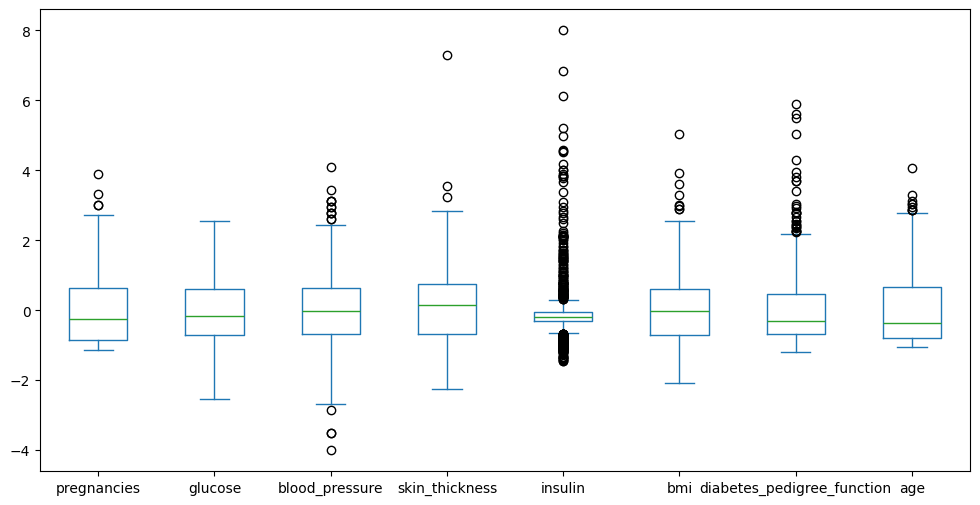

In [64]:
df_clean_standard[scale_columns].plot(kind="box", figsize=(12,6))

In [65]:
correlations = df_clean_standard.corr(method='pearson')
display.display(correlations)

pregnancies   glucose  blood_pressure  \
pregnancies                    1.000000  0.128213        0.208615   
glucose                        0.128213  1.000000        0.218937   
blood_pressure                 0.208615  0.218937        1.000000   
skin_thickness                 0.078829  0.213698        0.210935   
insulin                        0.023145  0.423182        0.047135   
bmi                            0.021559  0.231049        0.281257   
diabetes_pedigree_function    -0.033523  0.137327       -0.002378   
age                            0.544341  0.266909        0.324915   
outcome                        0.221898  0.492782        0.165723   

                            skin_thickness   insulin       bmi  \
pregnancies                       0.078829  0.023145  0.021559   
glucose                           0.213698  0.423182  0.231049   
blood_pressure                    0.210935  0.047135  0.281257   
skin_thickness                    1.000000  0.150196  0.703276   
insulin                           0.150196  1.000000  0.178974   
bmi                               0.703276  0.178974  1.000000   
diabetes_pedigree_function        0.125048  0.121377  0.153438   
age                               0.097404  0.103604  0.025597   
outcome                           0.266268  0.211731  0.312038   

                            diabetes_pedigree_function       age   outcome  
pregnancies                                  -0.033523  0.544341  0.221898  
glucose                                       0.137327  0.266909  0.492782  
blood_pressure                               -0.002378  0.324915  0.165723  
skin_thickness                                0.125048  0.097404  0.266268  
insulin                                       0.121377  0.103604  0.211731  
bmi                                           0.153438  0.025597  0.312038  
diabetes_pedigree_function                    1.000000  0.033561  0.173844  
age                                           0.033561  1.000000  0.238356  
outcome                                       0.173844  0.238356  1.000000

So sánh ma trận tương quan trước & sau khi điền giá trị

- Glucose – Outcome: Giữ nguyên (~0.49), mối liên hệ chính không thay đổi.
- Insulin – Glucose: Tăng (0.42 so với ~0.25), hợp lý hơn về mặt sinh lý.
- BMI – SkinThickness: Tăng mạnh (0.70 so với ~0.58), do liên quan trực tiếp khi điền.
- Blood Pressure – BMI: Tăng nhẹ (0.28 so với ~0.22), do điền theo nhóm.
- Các biến khác (Age, Pregnancies, DPF): Ít thay đổi.

**Kết luận:** Sau khi điền, mối quan hệ sinh lý hợp lý hơn, nhưng có nguy cơ một số tương quan bị “đẩy cao”.

#### (2) Chia dữ liệu thực nghiệm

+ Chuyển đổi dữ liệu sang dạng numpy với phần Input (X_data), Output (y_data)
+ Chia dữ liệu thành tập train/test (tỷ lệ 70/30)
+ Lưu tất cả thông tin để chuẩn bị chạy thuật toán

In [66]:
X_data, y_data = df_clean.values[:, :-1], df_clean.values[:, -1]
X_data.shape, y_data.shape
print(X_data[:20, :])
print(y_data[:20])

[[6.000e+00 1.480e+02 7.200e+01 3.500e+01 1.250e+02 3.360e+01 6.270e-01
  5.000e+01]
 [1.000e+00 8.500e+01 6.600e+01 2.900e+01 1.250e+02 2.660e+01 3.510e-01
  3.100e+01]
 [8.000e+00 1.830e+02 6.400e+01 1.700e+01 1.250e+02 2.330e+01 6.720e-01
  3.200e+01]
 [1.000e+00 8.900e+01 6.600e+01 2.300e+01 9.400e+01 2.810e+01 1.670e-01
  2.100e+01]
 [0.000e+00 1.370e+02 4.000e+01 3.500e+01 1.680e+02 4.310e+01 2.288e+00
  3.300e+01]
 [5.000e+00 1.160e+02 7.400e+01 2.300e+01 1.250e+02 2.560e+01 2.010e-01
  3.000e+01]
 [3.000e+00 7.800e+01 5.000e+01 3.200e+01 8.800e+01 3.100e+01 2.480e-01
  2.600e+01]
 [1.000e+01 1.150e+02 7.200e+01 3.700e+01 1.250e+02 3.530e+01 1.340e-01
  2.900e+01]
 [2.000e+00 1.970e+02 7.000e+01 4.500e+01 5.430e+02 3.050e+01 1.580e-01
  5.300e+01]
 [8.000e+00 1.250e+02 9.600e+01 3.000e+01 1.200e+02 3.230e+01 2.320e-01
  5.400e+01]
 [4.000e+00 1.100e+02 9.200e+01 3.700e+01 1.250e+02 3.760e+01 1.910e-01
  3.000e+01]
 [1.000e+01 1.680e+02 7.400e+01 3.700e+01 1.250e+02 3.800e+01 5.3

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, train_size=0.7)
print(f'+ Train/Test: Train Ratio = {len(X_train)/len(X_data)}')
print(f'+ Train: shape={X_train.shape}\nInput = \n{X_train[:5]}\nOutput = {y_train[:5]}')
print(f'+ Test: shape={X_test.shape}\nInput = \n{X_test[:5]}\nOutput = {y_test[:5]}')

+ Train/Test: Train Ratio = 0.69921875
+ Train: shape=(537, 8)
Input = 
[[  9.    165.     88.     30.    125.     30.4     0.302  49.   ]
 [  0.    146.     70.     37.    125.     37.9     0.334  28.   ]
 [  5.    103.    108.     37.    125.     39.2     0.305  65.   ]
 [  0.    173.     78.     32.    265.     46.5     1.159  58.   ]
 [  1.    116.     78.     29.    180.     36.1     0.496  25.   ]]
Output = [1. 1. 0. 0. 0.]
+ Test: shape=(231, 8)
Input = 
[[  4.    120.     68.     23.    125.     29.6     0.709  34.   ]
 [  1.    138.     82.     37.    125.     40.1     0.236  28.   ]
 [  5.    136.     82.     30.    125.     32.3     0.64   69.   ]
 [  1.    133.    102.     28.    140.     32.8     0.234  45.   ]
 [  1.     93.     56.     11.    125.     22.5     0.417  22.   ]]
Output = [0. 0. 0. 1. 0.]


In [68]:
# Lưu thông tin
save_dir = "exps/diabetes"
if os.path.exists(save_dir) == False: os.makedirs(save_dir)

# Save training data
np.savez(f'{save_dir}/data.npz', X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)
# Save cleaning data
df_clean.to_excel(f'{save_dir}/df_clean.xlsx', index=False)

os.listdir(save_dir)

['df_clean.xlsx', 'data.npz']

In [69]:
# Kiểm tra phục hồi dữ liệu
dict(np.load(f'{save_dir}/data.npz')).keys()

dict_keys(['X_train', 'X_test', 'y_train', 'y_test'])

In [70]:
pd.read_excel(f'{save_dir}/df_clean.xlsx')

pregnancies  glucose  blood_pressure  skin_thickness  insulin   bmi  \
0              6      148              72              35      125  33.6   
1              1       85              66              29      125  26.6   
2              8      183              64              17      125  23.3   
3              1       89              66              23       94  28.1   
4              0      137              40              35      168  43.1   
..           ...      ...             ...             ...      ...   ...   
763           10      101              76              48      180  32.9   
764            2      122              70              27      200  36.8   
765            5      121              72              23      112  26.2   
766            1      126              60              30      125  30.1   
767            1       93              70              31      125  30.4   

     diabetes_pedigree_function  age  outcome  
0                         0.627   50        1  
1                         0.351   31        0  
2                         0.672   32        1  
3                         0.167   21        0  
4                         2.288   33        1  
..                          ...  ...      ...  
763                       0.171   63        0  
764                       0.340   27        0  
765                       0.245   30        0  
766                       0.349   47        1  
767                       0.315   23        0  

[768 rows x 9 columns]

## Kết thúc